2.10.0
   indx    sc_name    year  month   day  hour  minute  second  lat[gsm rad]  \
0     0  AMPTE-CCE  1984.0    8.0  27.0  23.0    30.0     0.0     -0.080330   
1     1  AMPTE-CCE  1984.0    9.0  23.0   6.0     2.0     0.0     -0.063033   
2     2  AMPTE-CCE  1984.0   10.0   2.0  22.0    20.0     0.0      0.058263   
3     3  AMPTE-CCE  1984.0   10.0   2.0  23.0    31.0     0.0      0.067419   
4     4  AMPTE-CCE  1984.0   10.0  19.0   5.0    50.0     0.0      0.146382   
5     5  AMPTE-CCE  1984.0   11.0   1.0   5.0    20.0     0.0      0.219385   
6     6  AMPTE-CCE  1984.0   11.0  14.0  23.0    39.0     0.0      0.143107   
7     7  AMPTE-CCE  1984.0   11.0  15.0  19.0     0.0     0.0      0.232144   
8     8  AMPTE-CCE  1984.0   12.0  11.0  20.0    30.0     0.0      0.150238   
9     9  AMPTE-CCE  1984.0   12.0  11.0  20.0    47.0     0.0      0.154413   

   lon[gsm rad]    r[re]  bz[nT]  pdyn[nPa]  tilt[gsm rad]  
0      0.381186  8.22497    -4.5       6.23       0.129324  
1

c:\Users\kekea\OneDrive\Documents\GitHub\Abai-Mag\makedata.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bx'] = np.interp(data_time,sw_data['Epoch'],sw_data['BX_GSE'])
c:\Users\kekea\OneDrive\Documents\GitHub\Abai-Mag\makedata.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['By'] = np.interp(data_time,sw_data['Epoch'],sw_data['BY_GSM'])
c:\Users\kekea\OneDrive\Documents\GitHub\Abai-Mag\makedata.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Epoch 1/160
227/227 [==============================] - 1s 3ms/step - loss: 0.0282 - val_loss: 0.0177
Epoch 2/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0122
Epoch 3/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0094
Epoch 4/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0083
Epoch 5/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0076
Epoch 6/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0069
Epoch 7/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0059
Epoch 8/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0057
Epoch 9/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 10/160
227/227 [==============================] - 0s 2ms/step - loss: 0.0085 - val_lo

['input_yscaler.pkl']

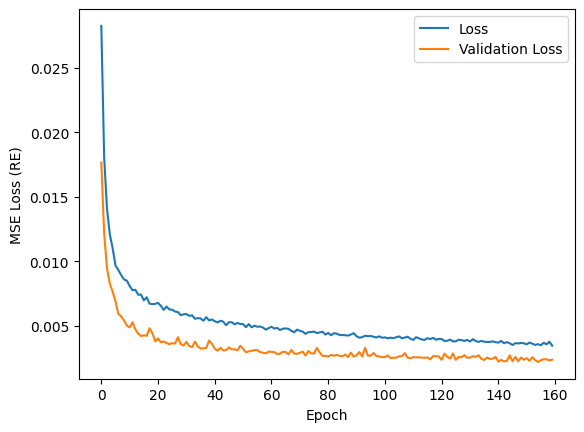

In [2]:

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib 
from makedata import makedata

print(tf.__version__)
#data load from directory

mag_data_path = 'C:/Users/kekea/OneDrive/MP_list_CSV.txt' #path to data
#mag_data = tf.keras.utils.get_file( 'MP_list_CSV.txt','C:/Users/kekea/OneDrive/Desktop/MP_list_CSV.txt')
data = pd.read_csv(mag_data_path) #read in data
print(data.head(10),data.dtypes) #display data preview and dtypes
magdata = makedata(data)
data_subset = magdata.iloc[:, 8:20]

y = data_subset['r[re]'] #Extracts the r[re] column from the dataset data and assigns it to the variable y 
X = data_subset.drop('r[re]', axis=1) #create new dataframe w/out r[re]
#normalize data
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()

X_norm = xscaler.fit_transform(X)
y_norm = yscaler.fit_transform(pd.DataFrame(y))
train, test, train_label, test_label  = train_test_split(X_norm,y_norm,test_size=0.2) #splt x and y in training and test
#train: Training set features (80% of X).
#test: Testing set features (20% of X).
#train_label: Training set labels (80% of y).
#test_label: Testing set labels (20% of y).




model = keras.models.Sequential([
    #keras.layers.Input(shape = (None, 2)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'linear')])

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate = 0.05), loss='mean_squared_error')
history = model.fit(train, train_label,
                    batch_size=32,
                    epochs=160,
                    validation_split=0.1)

xscaler.inverse_transform(X_norm)
yscaler.inverse_transform(y_norm)

y_train = model.predict(train)
y_train = yscaler.inverse_transform(y_train)
train_label = yscaler.inverse_transform(train_label)
print(np.mean((y_train-train_label)**2))

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss (RE)')

model.save('my_model2.keras')
joblib.dump(xscaler,'input_xscaler.pkl')
joblib.dump(yscaler,'input_yscaler.pkl')


In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import joblib
from makedata import makedata


def synth_mp (pdyn, bx, by, bz, vx, vy, vz, tilt, lat_lim = np.pi/2, lon_lim = np.pi/2, model_file = 'my_model2.keras'):
    
    #define lat and lon values
    lat_vals = np.linspace(-lat_lim, lat_lim, 100)
    lon_vals = np.linspace(-lon_lim, lon_lim, 100)
   
    # Create lat and lon arrays
    lat = np.tile(lat_vals, 100)  # Repeat the lat array 100 times
    lon = np.repeat(lon_vals, len(lat_vals))  # Repeat the lon array to match the length of lat
    
    #make df
    
    #fill data_input
    data_input = pd.DataFrame([])
    data_input['pdyn[nPa]'] = pdyn * np.ones(lat.shape)
    data_input['bz[nT]'] = bz * np.ones(lat.shape)
    data_input['Bz'] = bz * np.ones(lat.shape)
    data_input['Bx'] = bx * np.ones(lat.shape)
    data_input['By'] = by * np.ones(lat.shape)
    data_input['Vx'] = vx * np.ones(lat.shape)
    data_input['Vy'] = vy * np.ones(lat.shape)
    data_input['Vz'] = vz * np.ones(lat.shape)
    data_input['tilt[gsm rad]'] = tilt * np.ones(lat.shape)
    data_input['lat[gsm rad]'] = lat
    data_input['lon[gsm rad]'] = lon
    
    #reorder to match model
    order = ['lat[gsm rad]', 'lon[gsm rad]', 'bz[nT]', 'pdyn[nPa]', 'tilt[gsm rad]', 'Bx', 'By', 'Bz', 'Vx', 'Vy', 'Vz']
    data_input = data_input[order]
    
    #import scalers
    xscaler = joblib.load('input_xscaler.pkl')
    yscaler = joblib.load('input_yscaler.pkl')
     
    #scale inputs
    norm_input = xscaler.transform(data_input)
      
    #loads model makes r prediction array
    new_model = tf.keras.models.load_model(model_file)   
    r_predict = new_model.predict(norm_input)  # Make prediction
     
    #inv scale
    r = yscaler.inverse_transform(r_predict)
    
    #add r into data_input
    data_input['r'] = r
    
    #create lat, lon as np array
    lat = data_input['lat[gsm rad]'].to_numpy()
    lon = data_input['lon[gsm rad]'].to_numpy()
    r = np.reshape(r,len(r))
    
    #Convert to XYZ
    X = r* np.cos(lat)* np.cos(lon)
    Y = r* np.cos(lat)* np.sin(lon)
    Z = r* np.sin(lat)
    
    #CREATE PLOTS
    fig = plt.figure(figsize=(10, 8))

    #3D scatter of (X, Y, Z)
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.scatter(X, Y, Z, c='b', marker = 'o', s = 3, alpha=0.5)
    ax1.set_title("3D Scatter (X, Y, Z)")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")
    ax1.set_aspect('equal')


    #2D scatter of X vs Y
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.scatter(X, Y, c='r', marker = 'o', s = 3, alpha=0.5)
    ax2.set_title("XY Projection")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.grid(True)
    ax2.set_aspect('equal')

    
    #2D scatter of X vs Z
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.scatter(X, Z, c='g', marker = 'o', s = 3, alpha=0.5)
    ax3.set_title("XZ Projection")
    ax3.set_xlabel("X")
    ax3.set_ylabel("Z")
    ax3.grid(True)
    ax3.set_aspect('equal')


    #2D scatter of Z vs Y (equivalently Y vs Z or “ZX”)
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.scatter(Z, Y, c='m', marker = 'o', s = 3, alpha=0.5)
    ax4.set_title("ZY Projection")
    ax4.set_xlabel("Z")
    ax4.set_ylabel("Y")
    ax4.grid(True)
    ax4.set_aspect('equal')

    
    plt.tight_layout()
    plt.show()
    
    return None
    

313/313 [==============================] - 1s 1ms/step


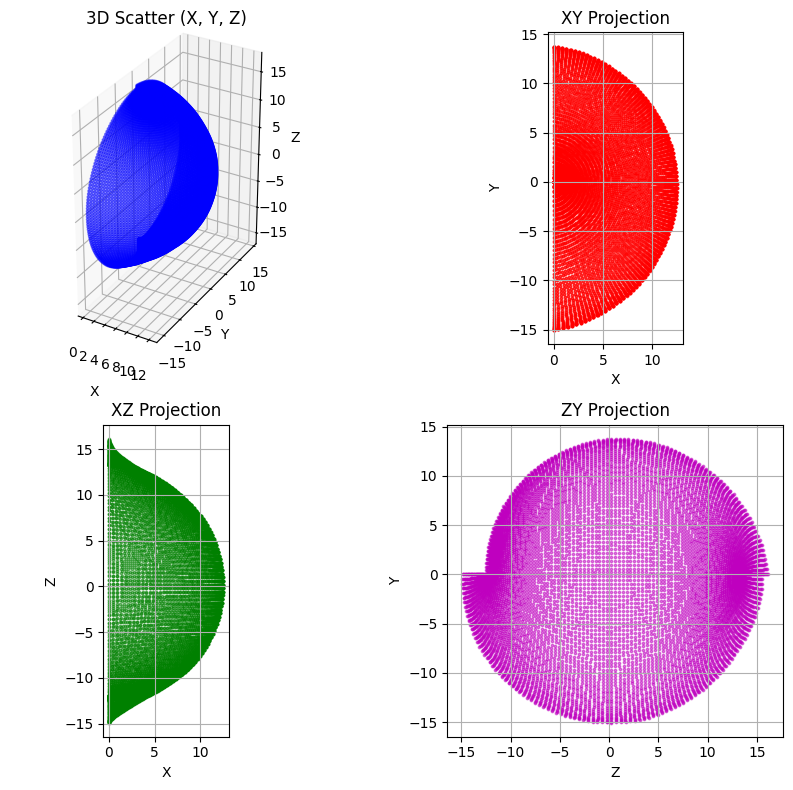

In [2]:
synth_mp(1, 0, 0, 0, 400, 0, 0, 0) #Example call to synth_mp function